In [1]:
# v1.0

# Early dataset division and visualization attempt

In [2]:
# Download data from JSON file, convert to DataFrame and clean it up
import pandas as pd
import numpy as np

# Read JSON file
df = pd.read_json('mileage.json')

# Convert 'Date' column into datetime
df['Date'] = pd.to_datetime(df['Date'])
# Remove brackets and single quotes from 'Mileage' column
df['Mileage'] = df['Mileage'].str.replace('[', '').str.replace(']', '').str.replace('\'', '')
# Convert 'Mileage' column into integer
df['Mileage'] = df['Mileage'].astype(int)

print(df[0:3])

                                            Filename       Date      Time  \
0  ../RentML/dataset/training/Osobowy\20210824_10... 2021-08-24  10:50:26   
1  ../RentML/dataset/training/Osobowy\20211029_17... 2021-10-29  17:55:36   
2  ../RentML/dataset/training/Osobowy\20211230_18... 2021-12-30  18:51:10   

   Mileage Type  
0   250284  car  
1   254410  car  
2   256163  car  


In [3]:
# Sort DataFrame by 'Date'
df = df.sort_values('Date')

# Attempt #3

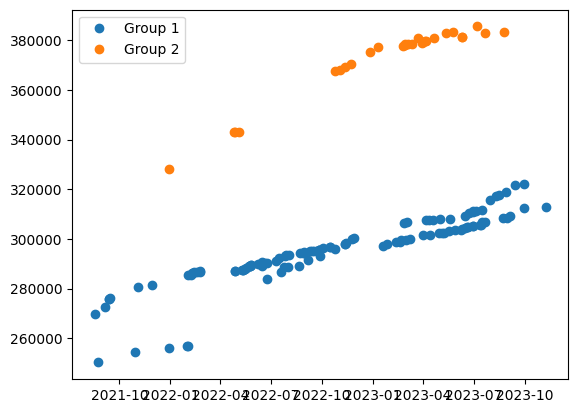

In [4]:
# ---
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate trend line
x = np.array(range(len(df))).reshape(-1, 1)
y = df['Mileage'].values
model = LinearRegression().fit(x, y)
trend = model.predict(x)

# Calculate point distances from trend line
distances = np.abs(y - trend)

# Divide points into two groups using k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(distances.reshape(-1, 1))
df['group'] = kmeans.labels_

# Extract groups
group1 = df[df['group'] == 0]
group2 = df[df['group'] == 1]

# Plot for group 1
plt.plot(group1['Date'], group1['Mileage'], label='Group 1', linestyle='', marker='o')

# Plot for group 2
plt.plot(group2['Date'], group2['Mileage'], label='Group 2', linestyle='', marker='o')

# Add legend
plt.legend()

# Display plot
plt.show()

# <center>Dataset properly divided into 3 subsets

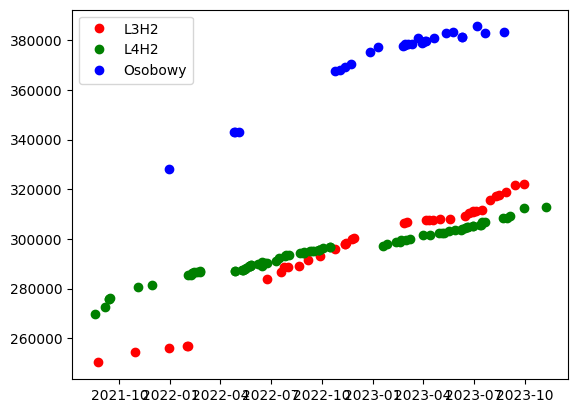

In [5]:
# Extract subgroups from group 1 based on 'Type' column
group1_car = group1[group1['Type'] == 'car']
group1_truck = group1[group1['Type'] == 'truck']

# Plot for group 1 type car
plt.plot(group1_car['Date'], group1_car['Mileage'], label='L3H2', linestyle='', marker='o', color='red')

# Plot for group 1 type truck
plt.plot(group1_truck['Date'], group1_truck['Mileage'], label='L4H2', linestyle='', marker='o', color='green')

# Plot for group 2
plt.plot(group2['Date'], group2['Mileage'], label='Osobowy', linestyle='', marker='o', color='blue')

# Add legend
plt.legend()

# Display plot
plt.show()

# <center>Outliers removal - discarded for now

In [6]:
# Outliers detection and removal
import pandas as pd

# Choose column to detect outliers
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_no_outliers = df[~((df['Mileage'] < (Q1 - 1.3 * IQR)) | (df['Mileage'] > (Q3 + 1.3 * IQR)))]

In [7]:
# Calculate linear trend between first and last point after removing outliers
start_mileage = df_no_outliers.iloc[0]['Mileage']
end_mileage = df_no_outliers.iloc[-1]['Mileage']
total_time = (df_no_outliers.iloc[-1]['Date'] - df_no_outliers.iloc[0]['Date']).days
slope = (end_mileage - start_mileage) / total_time

print(slope)

52.720443349753694


In [8]:
# Calculate deviation of each point from trend after removing outliers
df_no_outliers['Trend'] = start_mileage + slope * (df_no_outliers['Date'] - df_no_outliers.iloc[0]['Date']).dt.days
df_no_outliers['Deviation'] = df_no_outliers['Mileage'] - df_no_outliers['Trend']

C:\Users\Dragon\AppData\Local\Temp\ipykernel_1232\3337589771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Trend'] = start_mileage + slope * (df_no_outliers['Date'] - df_no_outliers.iloc[0]['Date']).dt.days
C:\Users\Dragon\AppData\Local\Temp\ipykernel_1232\3337589771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Deviation'] = df_no_outliers['Mileage'] - df_no_outliers['Trend']


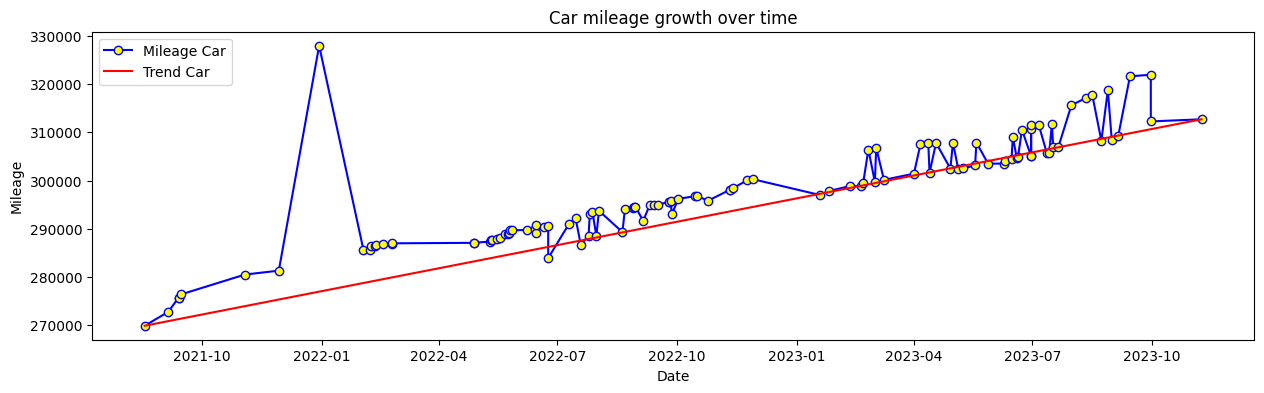

In [10]:
# Plot + trend after removing outliers
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(15, 4))

# Draw data with point labels and changed marker colors
plt.plot(df_no_outliers['Date'], df_no_outliers['Mileage'], label='Mileage Car', marker='o', color='blue', markerfacecolor='yellow')

# Draw trend line
plt.plot(df_no_outliers['Date'], df_no_outliers['Trend'], label='Trend Car', color='red')

# Add legend
plt.legend()

# Add labels to axes
plt.xlabel('Date')
plt.ylabel('Mileage')

# Add name to the plot
plt.title('Car mileage growth over time')

# Wyświetl wykres
plt.show()